In [1]:
import numpy as np, matplotlib as plt, pandas as pd, os, sys
from matplotlib import pyplot

In [25]:
## collect data from pickeed dfs

n_e = 9
lag = 32
n_srvs = 4

x_list = [(i+1) for i in range(n_e)] + [(i+1)*10 for i in range(n_e)]
#x_list = [(i+1)*10 for i in range(n_e)]
print(x_list)
y_dict = {'10k-AT': np.zeros((n_e*2, 3)),
          '10k-GC': np.zeros((n_e*2, 3)),
          'full-AT': np.zeros((n_e*2, 3)),
          '1k-AT': np.zeros((n_e*2, 3)),
          '1k-GC': np.zeros((n_e*2, 3))}  

for file in os.listdir(os.getcwd()):
    
    if 'mdtraj' in file:
          
        df = pd.read_pickle(file)
        train_score, test_score = df['train_test'][1], df['train_test'][2]
        diff_score = train_score  - test_score
        score_list = np.array([train_score, test_score, diff_score])

        if 'trim-10K' in file and '20KL_AT' in file:
            sm = (int(file.replace('trim-10K_lag_32_sm_5_ep_', '').replace('_-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['10k-AT'][x_list.index(sm)] = score_list
            
        elif 'trim-10K' in file and '20KL_GC' in file:
            sm = (int(file.replace('trim-10K_lag_32_sm_5_ep_', '').replace('_-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
            y_dict['10k-GC'][x_list.index(sm)] = score_list
        
        elif 'full-221' in file and '20KL_AT' in file:
            sm = (int(file.replace('full-221_lag_32_sm_5_ep_', '').replace('_-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['full-AT'][x_list.index(sm)] = score_list
            
        elif 'trim_1k' in file and '20KL_AT' in file:
            sm = (int(file.replace('trim_1k_lag_32_sm_5_ep_', '').replace('_-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['1k-AT'][x_list.index(sm)] = score_list

        elif 'trim_1k' in file and'20KL_GC' in file:
            sm = (int(file.replace('trim_1k_lag_32_sm_5_ep_', '').replace('_-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
            y_dict['1k-GC'][x_list.index(sm)] = score_list 

        
        
        else:
            print ('other conditions')

print(y_dict)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90]
{'10k-AT': array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [5.95950842, 5.94914818, 0.01036024],
       [5.97223282, 5.95144367, 0.02078915],
       [5.97654629, 5.9302969 , 0.04624939],
       [5.97748709, 5.9524684 , 0.02501869],
       [5.97856855, 5.9600172 , 0.01855135],
       [5.98333693, 5.95467091, 0.02866602],
       [5.98426151, 5.93957472, 0.04468679],
       [5.98662996, 5.95129967, 0.0353303 ],
       [5.98677206, 5.94861698, 0.03815508]]), '10k-GC': array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.   

Text(0.5, 0, 'number of epochs')

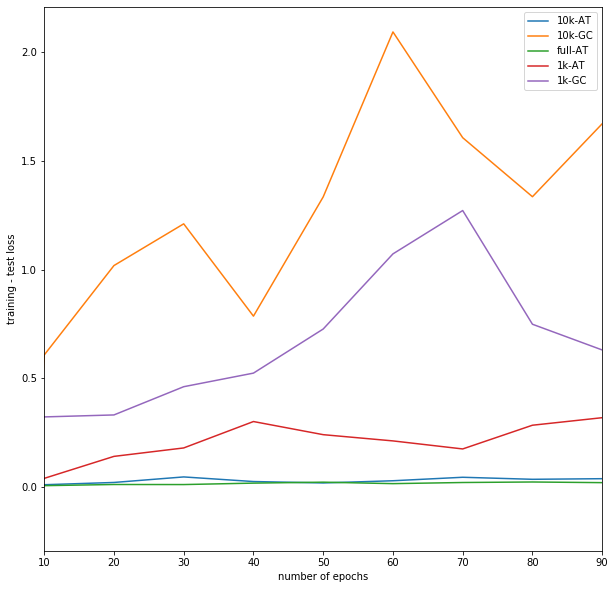

In [29]:
## makes plots

fig, ax = plt.pyplot.subplots(figsize=(10, 10))

for j, key in enumerate(y_dict):

    y_list = y_dict[key][:, 2]
    #ax.plot(x_list, y_dict[key][:, 0], label=key)
    #ax.plot(x_list, y_dict[key][:, 1], label=key)
    ax.plot(x_list, y_dict[key][:, 2], label=key)
    ax.legend()

ax.set_xlim(xmin=10, xmax=90)
ax.set_ylabel('training - test loss')
ax.set_xlabel('number of epochs')

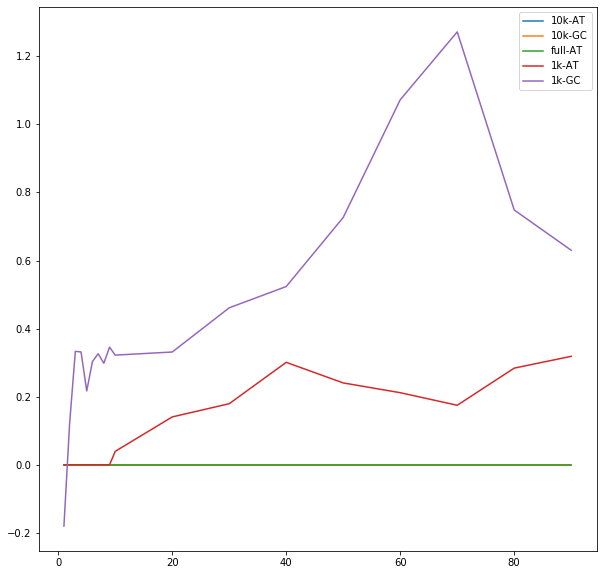

In [19]:
## makes plots

fig, ax = plt.pyplot.subplots(figsize=(10, 10))

for j, key in enumerate(y_dict):

    y_list = y_dict[key][:, 2]
    #ax.plot(x_list, y_dict[key][:, 0], label=key)
    #ax.plot(x_list, y_dict[key][:, 1], label=key)
    ax.plot(x_list, y_dict[key][:, 2], label=key)
    ax.legend()